In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_function(classifier, limits=(-4,4), color = "gray", levels=0,labels=False):
    xx, yy = np.meshgrid(np.linspace(limits[0], limits[1], 500), np.linspace(limits[0], limits[1], 500))
    X=np.c_[xx.ravel(), yy.ravel()]

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #plt.contour(xx, yy, Z, cmap=color,levels=levels)
    #fig, ax = plt.subplots()
    def fmt(x):
      s = f"{x:.1f}"
      if s.endswith("0"):
        s = f"{x:.0f}"
      return rf"{s}" if plt.rcParams["text.usetex"] else f"{s}"
    CS = plt.contour(xx, yy, Z, cmap=color,levels=levels)
    if labels:
      plt.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10)


Here we define a classification function called nodes whose input is a vector of dimension 2 and that consists of two nodes with logit activation. This is, the input is ${\bf x}\in \mathbb{R}^2$.

We define the logistic function as
$$
\sigma(z)= \frac{1}{1+e^{-z}}
$$
and the classifier has the expression
$$
o({\bf x})=\sum_i w^{(2)}_i\sigma(z_i) + b^{(2)}
$$
where
$$
z_i = {\bf w}^{(1)\top}_i {\bf x} + b^{(1)}_i
$$
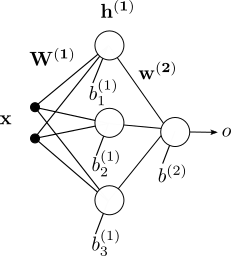

In [ ]:
class nodes:
  def __init__(self,W1,b1,w2,b2):
    self.W1=W1
    self.b1=b1
    self.w2=w2
    self.b2=b2

  def predict(self,X):
    D=self.W1.shape[1] # Number of vectors (or number of nodes)
    N=X.shape[0] # number of data
    o=np.zeros(N)
    for i in range(D):
      o=o+w2[i]*self.logistic(self.W1[:,i].T@X.T + self.b1[i])
    o=o+self.b2
    return o
  def logistic(self, z):
    s=1/(1+np.exp(-z))
    return s

In the next lines we construct the linear classifier
$z= {\bf w}^{\top} {\bf x} + b $ in order to plot these functions.

In [ ]:
class linear:
  def __init__(self,W,b):
    self.W=W
    self.b=b
  def predict(self,X):
    N=X.shape[0] # number of data
    o=self.W.T@X.T + self.b
    return o

in the next cell we construct an object with the class 'nodes' with four nodes, We listed four examples below. The input weights for the last one are
$$
{\bf W}^{(1)}= \left(
\begin{array}{rrrr}
1& 1& -1& -1\\
1&-1&1&-1\\
\end{array}\right)
$$
$$
{\bf b}^{(1)}=\left(-5, ~6, ~ 2.5, ~-5  \right)^\top
$$

The output weights are
$$
{\bf w}^{(2)}=\left(-1, ~1, ~1, ~-1  \right)^\top
$$
$$
{b}^{(2)}=-1.5
$$




In [ ]:
W1=np.array([[1, 1, -1, -1],[1, -1, 1, -1]])
b1=np.array([-5,6,2.5,-5])
boundary='square'

if boundary=='xor':
  #Xor
  w2=np.array([1, 1, 1, 1])
  b2=-2
elif boundary=='square':
  #Square
  w2=np.array([1, -1, -1, 1])
  b2=1

elif boundary=='local':
  #Local approx
  w2=np.array([-1, 1, 1, -1])
  b2=-0.5

elif boundary=='local2':
  #Another Local approx
  w2=np.array([-1, 1, 1, -1])
  b2=-1.5


classifier=nodes(W1,b1,w2,b2)


Next, we plot the decision function together with the linear functions inside of each one of the nodes. Repeat the experiment changing the sign and the value of b2.

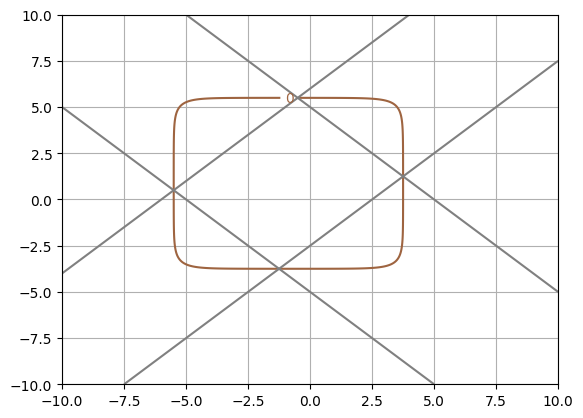

In [ ]:
plot_decision_function(classifier, limits=(-10,10),levels=0,color='copper',labels=True)


for i in range(W1.shape[1]):
  lines=linear(W1[:,i],b1[i])
  plot_decision_function(lines, limits=(-10,10))
plt.grid(True)
plt.show()

The generated plot shows the lines defined by each one of the linear operations inside each one of the three nodes, and the nonlinear classfication boundary refined by the three nodes. As it can be seen, this example is a case where each neuron is a local approximator. A neural network output can be considered as an ensemble classifier.

In [ ]:
def logistic(z):
    s=1/(1+np.exp(-z))
    return s

o=0
for i in range(3):
  lines=linear(W1[:,i],b1[i])
  z=lines.predict(np.c_[0,1.25])
  #print (z)
  print(logistic(z))
  o=o+logistic(z)*w2[i]
o=o+b2
print(o)


[0.02297737]
[0.99142251]
[0.97702263]
[-0.94546777]


In [ ]:
np.arange(-2,3)